In [76]:
import numpy as np
from qs_mps.mps_class import MPS
from qs_mps.utils import tensor_shapes, truncation, create_sequential_colors, mps_to_vector
from qs_mps.sparse_hamiltonians_and_operators import *
from matplotlib import pyplot as plt

In [85]:
grid = np.linspace(0,2,32)
L = 12
chis = [2,4,8,16,32,64]
trunc_chi = True
trunc_tol = False
type_shape = "rectangular" # "trapezoidal"
long = "X"
trans = "Z"
eps = 0

mag = []
ene = []
entr = []
sv = []
overlap = []
for chi in chis:
    mag_chi = []
    ene_chi = []
    entr_chi = []
    sv_chi = []
    overlap_chi = []

    mag_exact = []
    ene_exact = []
    v0 = np.full(2**L, (1/np.sqrt(2))**L)
    sparse = True

    for h in grid:
        print(f"ground state search for h: {h}")
        chain = MPS(L=L,d=2,model="Ising",chi=chi, eps=eps, J=1, h=h)
        chain._random_state(seed=3, type_shape=type_shape)
        chain.canonical_form(trunc_chi=trunc_chi, trunc_tol=trunc_tol)
        energy, entropy, schmidt_vals = chain.DMRG(trunc_chi=trunc_chi, trunc_tol=trunc_tol, n_sweeps=8, conv_tol=1e-12, long=long, trans=trans, where=L//2)
        chain.order_param(op=long)
        mag_chi.append(chain.mpo_first_moment().real/L)
        ene_chi.append(energy[-1])
        entr_chi.append(entropy)
        sv_chi.append(schmidt_vals)

        H = Ising(L=L, h=h, eps=eps)
        e, v = diagonalization(H, sparse=sparse, v0=v0)
        gs = v[:,0]
        ene_exact.append(e[0])
        mag_exact.append((gs.conjugate().T @ magnetization(L=L) @ gs).real)
        v0 = gs

        psi_mps = mps_to_vector(chain.sites)
        overlap_chi.append((gs.T @ psi_mps).real)
    mag.append(mag_chi)
    ene.append(ene_chi)
    entr.append(entr_chi)
    sv.append(sv_chi)
    overlap.append(overlap_chi)

ground state search for h: 0.0
Sweep n: 0

Sweep n: 1

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
1 sweeps at site 2
total iterations 23
total time: 0.08069199998863041
##############################
ground state search for h: 0.06451612903225806
Sweep n: 0

Sweep n: 1

Sweep n: 2

Sweep n: 3

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
3 sweeps at site 2
total iterations 45
total time: 0.10874709999188781
##############################
ground state search for h: 0.12903225806451613
Sweep n: 0

Sweep n: 1

Sweep n: 2

Sweep n: 3

##############################
The energy between the two last updated states converged
to an order of 1e-12 after:
3 sweeps at site 2
total iterations 45
total time: 0.10851970000658184
##############################
ground state search for h: 0.1935483870967742
Sweep n: 0

Sweep n: 1

Sweep n: 2

Sweep n: 3

#######

In [74]:
mag_exact = []
ene_exact = []
v0 = np.full(2**L, (1/np.sqrt(2))**L)
sparse = True
for h in grid:
    H = Ising(L=L, h=h, eps=eps)
    e, v = diagonalization(H, sparse=sparse, v0=v0)
    gs = v[:,0]
    ene_exact.append(e[0])
    mag_exact.append((gs.conjugate().T @ magnetization(L=L) @ gs).real)
    v0 = gs

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_19188\3645809416.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, m, 'o', color=colors[i], label=f"$\chi={chi}$")


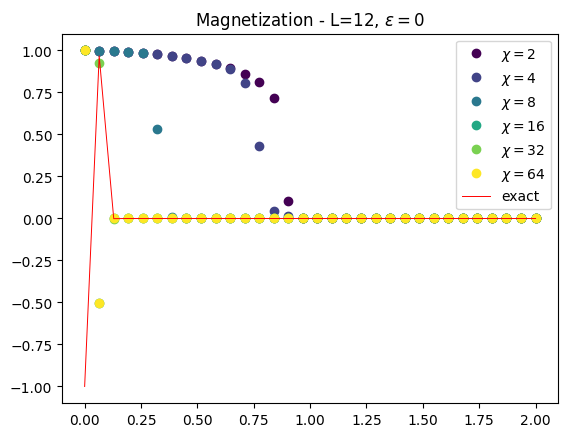

In [86]:
colors = create_sequential_colors(len(chis), colormap_name='viridis')
i = 0
for m, chi in zip(mag, chis):
    plt.plot(grid, m, 'o', color=colors[i], label=f"$\chi={chi}$")
    i += 1

plt.plot(grid, mag_exact, '-', color='red', linewidth=0.7, label="exact")
plt.title(f'Magnetization - L={L}, $\\varepsilon ={eps}$')
plt.legend()
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_19188\3863098653.py:4: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, np.abs(o), 'x-', color=colors[i], label=f"$\chi={chi}$")


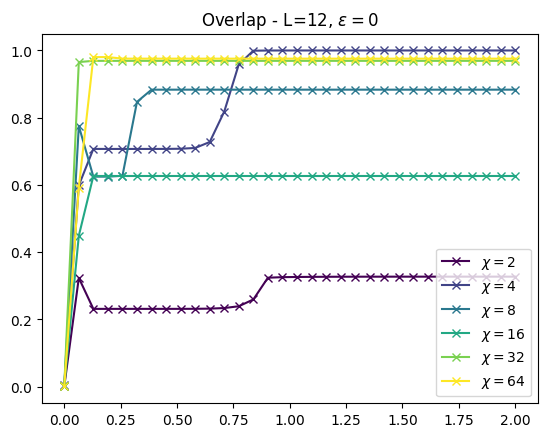

In [87]:
colors = create_sequential_colors(len(chis), colormap_name='viridis')
i = 0
for o, chi in zip(overlap, chis):
    plt.plot(grid, np.abs(o), 'x-', color=colors[i], label=f"$\chi={chi}$")
    i += 1

plt.title(f'Overlap - L={L}, $\\varepsilon ={eps}$')
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_19188\2763005083.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, e, 'x', color=colors[i], label=f"$\chi={chi}$")


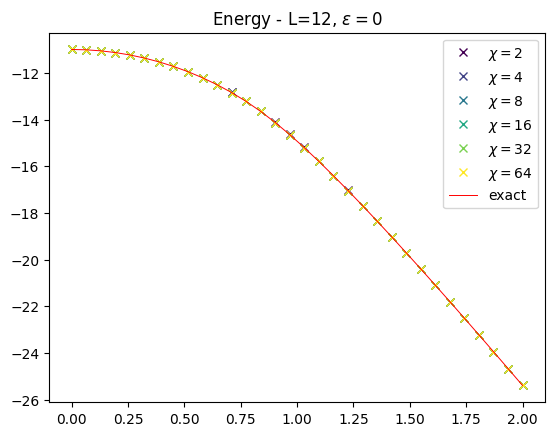

In [88]:
i = 0
for e, chi in zip(ene, chis):
    plt.plot(grid, e, 'x', color=colors[i], label=f"$\chi={chi}$")
    i += 1
plt.plot(grid, ene_exact, '-', color='red', linewidth=0.7, label="exact")
plt.title(f'Energy - L={L}, $\\varepsilon ={eps}$')
plt.legend()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_19188\2684290091.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, e, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")


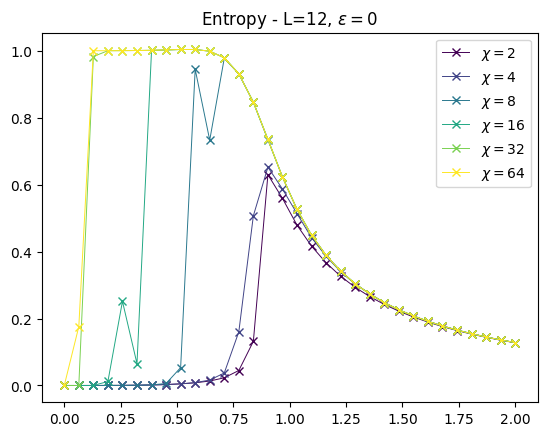

In [89]:
i = 0
for e, chi in zip(entr, chis):
    plt.plot(grid, e, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")
    i += 1
plt.title(f'Entropy - L={L}, $\\varepsilon ={eps}$')
plt.legend()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_19188\3839189104.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(grid, svals_trunc, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")


[1.]
[9.99999966e-01 2.60688438e-04]
[0.99999945 0.00104933]
[0.99999715 0.00238617]
[0.99999073 0.00430671]
[0.99997644 0.00686484]
[0.9999486  0.01013884]
[0.99989854 0.01424495]
[0.99981233 0.01937258]
[0.99966507 0.02587962]
[0.99940294 0.03455088]
[0.99887898 0.04733688]
[0.99754095 0.07008609]
[0.99080257 0.13531543]
[0.91752137 0.39768648]
[0.93242716 0.36135797]
[0.94698835 0.32126789]
[0.95704968 0.28992398]
[0.96428198 0.26487782]
[0.96968308 0.24436594]
[0.97384751 0.22720263]
[0.97714337 0.21258134]
[0.97980827 0.19993936]
[0.98200151 0.18887307]
[0.98383353 0.1790854 ]
[0.98538323 0.17035228]
[0.98670835 0.16250118]
[0.98785213 0.15539682]
[0.98884753 0.14893139]
[0.98972013 0.14301768]
[0.99049006 0.13758432]
[0.99117335 0.1325722 ]
[1.]
[9.99999966e-01 2.60688562e-04 6.79570714e-08 1.76700020e-11]
[9.99999449e-01 1.04934048e-03 1.10055293e-06 1.15928532e-09]
[9.99997153e-01 2.38626849e-03 5.69352657e-06 1.13806601e-08]
[9.99990723e-01 4.30731019e-03 1.85461916e-05 7.9380

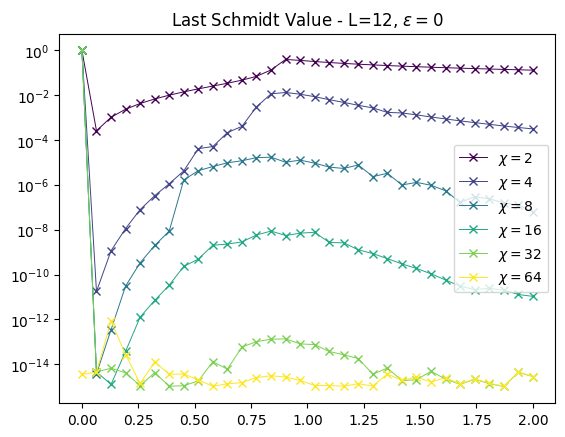

In [90]:
i = 0
for sv_chi, chi in zip(sv, chis):
    svals_trunc = []
    for s in sv_chi:
        condition = s[0] >= 1e-15
        s_trunc = np.extract(condition, s[0])
        s = s[0][:len(s_trunc)]
        print(s)
        svals_trunc.append(s[-1])
    plt.plot(grid, svals_trunc, 'x-', color=colors[i], linewidth=0.7, label=f"$\chi={chi}$")
    i += 1
plt.yscale('log')
plt.title(f'Last Schmidt Value - L={L}, $\\varepsilon ={eps}$')
plt.legend()
plt.show()
